# EU-ETS

The primary market for European Union Allowances (EUAs) is operated by the European Energy Exchange (EEX). The spot price is determined through daily auctions, and the results are available on [this URL](https://www.eex.com/en/market-data/environmental-markets/eua-primary-auction-spot-download). The purpose of this Jupyter notebook is to parse the archived Excel spreadsheets, gather information of interest, and combine them into a single Pandas dataframe.

## Updates

Load the latest spreadsheet, check which recent price values are missing from our current time-series, and append just these values  to the time-series.

In [57]:
# First load the local CSV file as dataframe.
filename = 'eua_price_history.csv'
df0 = pd.read_csv(filename, index_col='date', parse_dates=[0])
date0 = df0.index[-1]

# Now Load the latest Excel spreadshee from EEX as dataframe
url = 'https://public.eex-group.com/eex/eua-auction-report/'
file = 'emission-spot-primary-market-auction-report-2023-data.xlsx'
data = pd.read_excel(url+file, header=5, parse_dates=[0])

# Trim the EEX data to just date, price, and volume columns
data.set_index('Date',inplace=True)
data = data[data.columns[(data.columns.str.contains('Auction Volume')) | 
                         (data.columns.str.contains('Auction Price'))]]
data.rename(columns={data.columns[0]:'price', data.columns[1]:'volume'}, inplace=True)
data.index.name = 'date'

# Append new price values to CSV file
new = data.loc[data.index > date0]
new.sort_index().to_csv(filename, mode='a', header=False, date_format='%Y-%m-%d')
print('Appended ',len(new.index),' rows.')

Appended  0  rows.


/home/dmitri/.local/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


## Initial gathering

Process all the historical data.

In [1]:
# This year's (2023) data in Excel format
url = 'https://public.eex-group.com/eex/eua-auction-report/'
cur_file = 'emission-spot-primary-market-auction-report-2023-data.xlsx'

# Archived historical data in Excel format
# note that hist_url directory is inaccessible, but the Excel files should be
hist_url = 'https://www.eex.com/fileadmin/EEX/Downloads/EUA_Emission_Spot_Primary_Market_Auction_Report/Archive_Reports/'
new_format = ['emission-spot-primary-market-auction-report-2022-data.xlsx',
              'emission-spot-primary-market-auction-report-2021-data.xlsx',
              'emission-spot-primary-market-auction-report-2020-data.xlsx',
              'emission-spot-primary-market-auction-report-2019-data.xls',
              'emission-spot-primary-market-auction-report-2018-data.xls',
              'emission-spot-primary-market-auction-report-2017-data.xls'
             ]

old_format = ['emission-spot-primary-market-auction-report-2016-data.xls', #< Different column labels
              'emission-spot-primary-market-auction-report-2015-data.xls',
              'emission-spot-primary-market-auction-report-2014-data.xls',
              'emission-spot-primary-market-auction-report-2013-data.xls',
              'emission-spot-primary-market-auction-report-2012-data.xls'
             ]

In [43]:
import pandas as pd

df = pd.DataFrame()

# See the following answers on StackOverflow to select columns with partial match on column name
# https://stackoverflow.com/questions/31551412/how-to-select-dataframe-columns-based-on-partial-matching

for file in [cur_file]+new_format:
    #source = hist_url+file
    source = file
    data = pd.read_excel(source, header=5, parse_dates=[0])
    data.set_index('Date',inplace=True)
    data = data[data.columns[(data.columns.str.contains('Auction Volume')) | 
                             (data.columns.str.contains('Auction Price'))]]
    data.rename(columns={data.columns[0]:'price', data.columns[1]:'volume'}, inplace=True)
    df = pd.concat([df,data])

for file in old_format:
    #source = hist_url+file
    source = file
    data = pd.read_excel(source, header=2, parse_dates=[0])
    data.set_index('Date',inplace=True)
    data = data[data.columns[(data.columns.str.contains('Auction Volume')) | 
                             (data.columns.str.contains('Auction Price'))]]
    data.rename(columns={data.columns[0]:'price', data.columns[1]:'volume'}, inplace=True)
    df = pd.concat([df,data])

df.index.name = 'date'

/home/dmitri/.local/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/dmitri/.local/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/dmitri/.local/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/dmitri/.local/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


(15340.0, 19723.0)

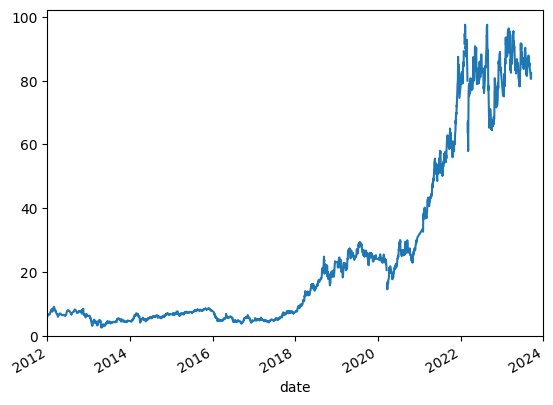

In [44]:
ax = df['price'].plot()
ax.set_ylim(0)
ax.set_xlim(pd.to_datetime("2012-01-01"), pd.to_datetime("2024-1-1"))

In [45]:
df.sort_index().to_csv('eua_price_history.csv', date_format='%Y-%m-%d')

(15340.0, 19723.0)

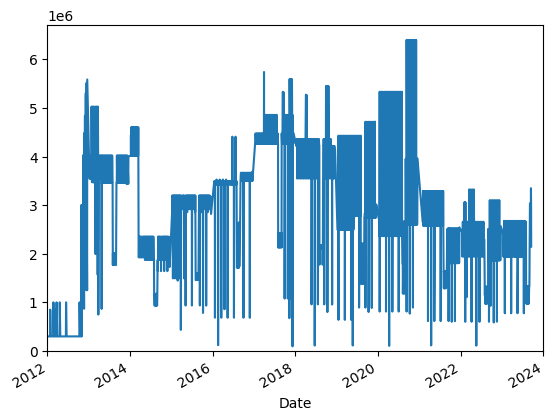

In [35]:
ax = df['volume'].plot()
ax.set_ylim(0)
ax.set_xlim(pd.to_datetime("2012-01-01"), pd.to_datetime("2024-1-1"))